#### Import the libraries

In [17]:
import pandas as pd   # data preprocessing
import numpy as np    # mathematical computation
import matplotlib.pyplot as plt  # vizualization
import seaborn as sns   # seaborn

#### Read the dataset

In [3]:
df = pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


#### Shape

In [6]:
df.shape
# rows=1302, cols=13

(1302, 13)

### Data Preprocessing

#### 1) Handle the Null values

In [7]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

#### 2) Handle the duplicates

In [8]:
df.duplicated().sum()

0

#### 3) Drop Redundant columns

In [9]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Ram', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [11]:
df['Unnamed: 0'].nunique()

1302

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

#### 4) Check the data types

In [14]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [ ]:
# EDA
# Correlation
# Handling Outliers

### EDA (Exploratory Data Analysis)

In [15]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

#### Depict Count of top 7 companies on a Countplot 

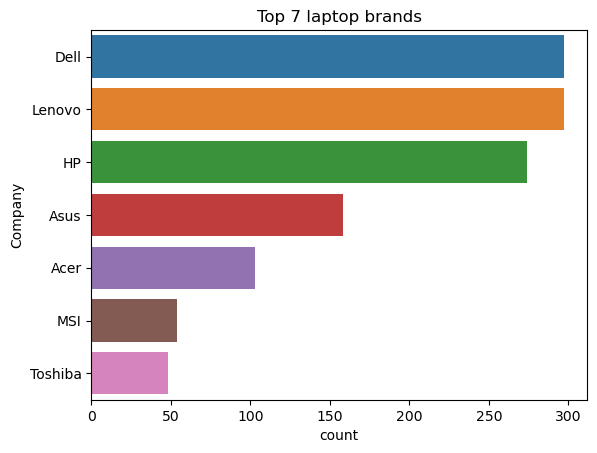

In [29]:
sns.countplot(y=df['Company'],
              order=df['Company'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 laptop brands')
plt.show()

#### Inference
1) Dell, Lenovo and HP are most sort after brands.

#### Depict Top 6 Latop types based on Count

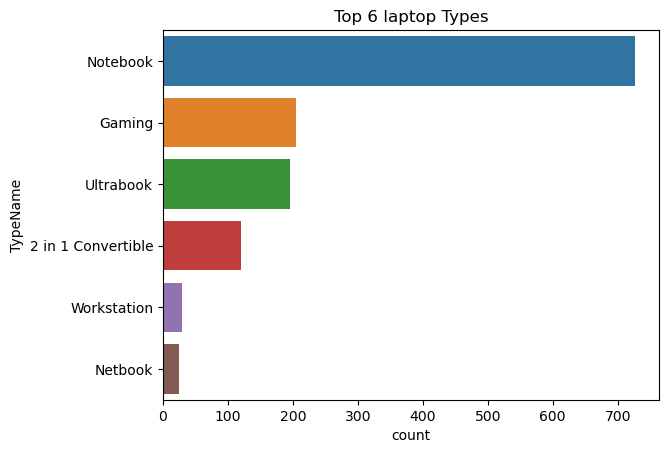

In [28]:
sns.countplot(y=df['TypeName'],
             order=df['TypeName'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('Top 6 laptop Types')
plt.show()

#### Inference
1) Notebook is most used laptop type.

#### Depict Top 3 GPUs

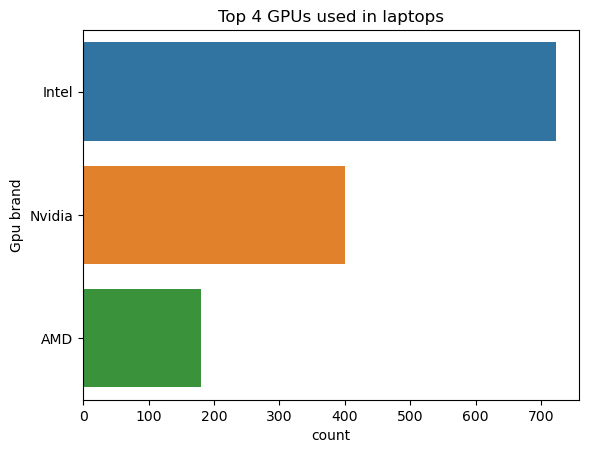

In [27]:
sns.countplot(y=df['Gpu brand'],
              order=df['Gpu brand'].value_counts().sort_values(ascending=False).index)
plt.title('Top 4 GPUs used in laptops')
plt.show()

#### Inference
1) Intel is the most used GPU

#### Boxplot for different CPU 

In [31]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

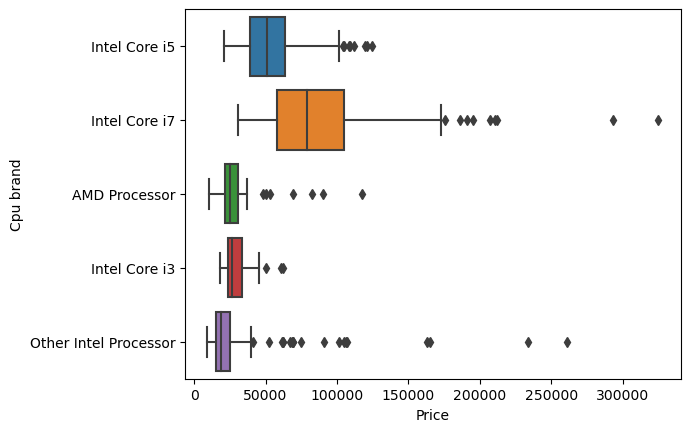

In [33]:
sns.boxplot(y=df['Cpu brand'],x=df['Price'])
plt.show()

#### Boxplot for different GPU

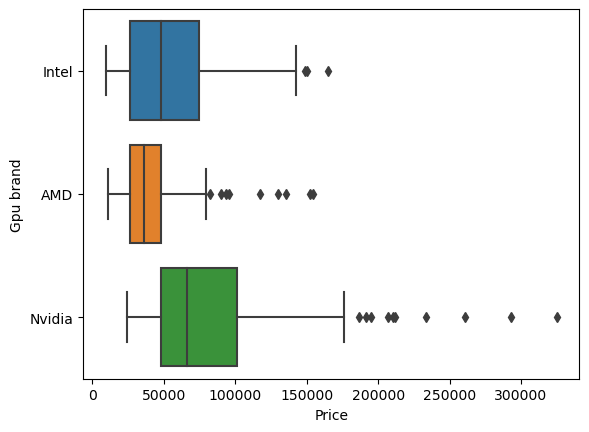

In [34]:
sns.boxplot(y=df['Gpu brand'],x=df['Price'])
plt.show()

#### Boxplot for Company based on Price

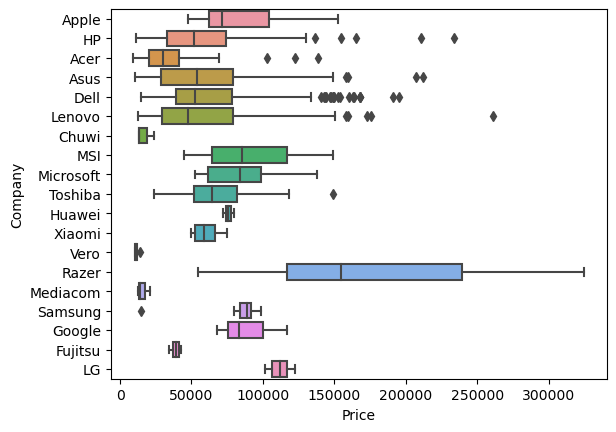

In [35]:
sns.boxplot(y=df['Company'],x=df['Price'])
plt.show()

#### Distribution Plot for Price

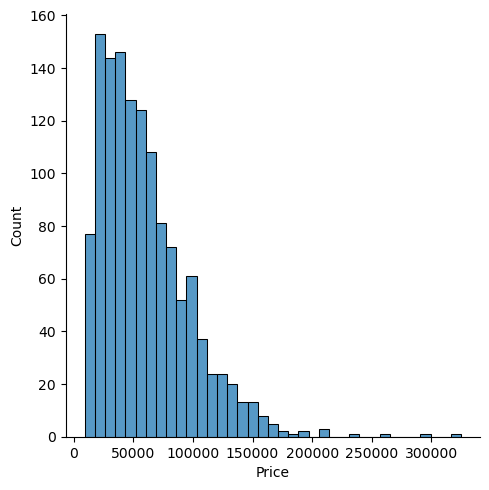

In [42]:
sns.displot(df['Price'])
plt.show()

### Correlation

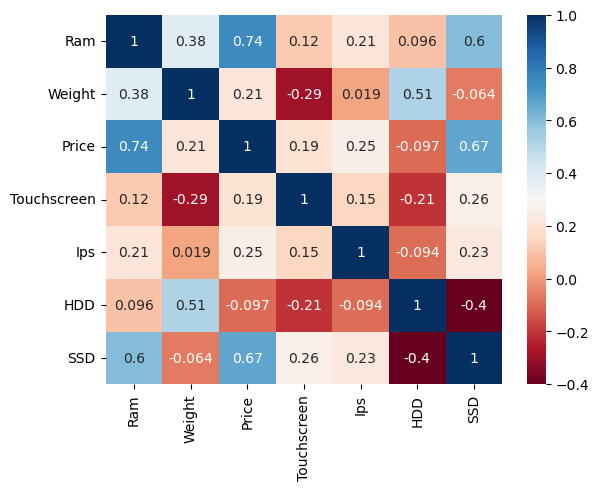

In [38]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

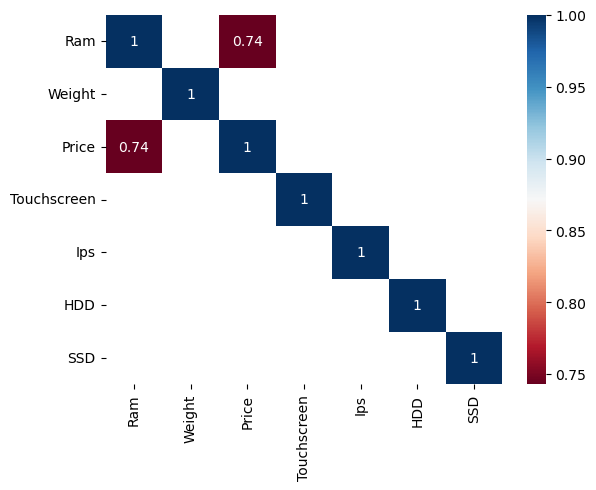

In [39]:
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

### Outliers

In [44]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
Ram,1302.0,8.385561,5.085166,2.00,2.00,4.0000,4.000000,4.00,8.00,16.0000,16.000000,32.000000,64.00
Weight,1302.0,2.039416,0.665274,0.69,0.97,1.0802,1.100000,1.17,2.04,3.7800,4.298000,4.420000,4.70
Price,1302.0,59889.058673,37251.183866,9270.72,12201.12,13747.3056,14811.323184,16463.52,52107.84,144474.5808,152848.076256,167777.851536,324954.72
Touchscreen,1302.0,0.146697,0.353940,0.00,0.00,0.0000,0.000000,0.00,0.00,1.0000,1.000000,1.000000,1.00
Ips,1302.0,0.279570,0.448960,0.00,0.00,0.0000,0.000000,0.00,0.00,1.0000,1.000000,1.000000,1.00
HDD,1302.0,414.101382,515.889348,0.00,0.00,0.0000,0.000000,0.00,0.00,1000.0000,2000.000000,2000.000000,2000.00
SSD,1302.0,183.874040,186.969314,0.00,0.00,0.0000,0.000000,0.00,256.00,512.0000,512.000000,1000.000000,1024.00


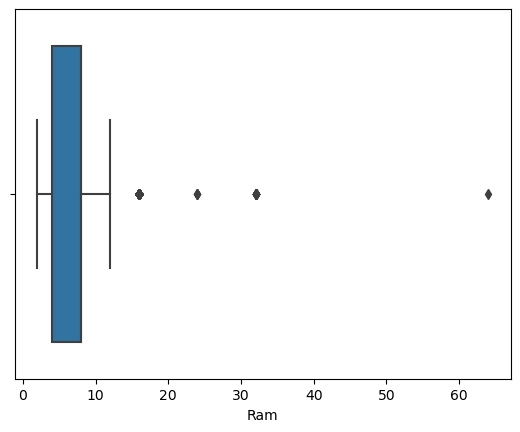

In [46]:
sns.boxplot(x=df['Ram'])
plt.show()

In [48]:
print(df[df['Ram']>20].shape)

(21, 12)


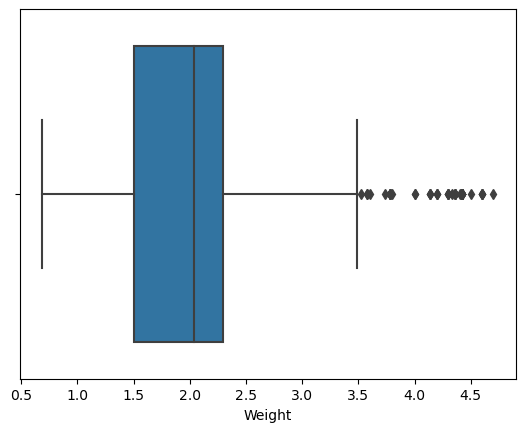

In [49]:
sns.boxplot(x=df['Weight'])
plt.show()

In [50]:
print(df[df['Weight']>3.5].shape)

(46, 12)


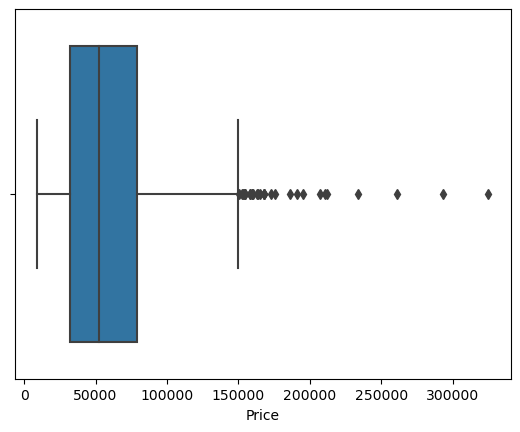

In [52]:
sns.boxplot(x=df['Price'])
plt.show()

In [54]:
print(df[df['Price']>200000].shape)

(7, 12)


#### Outlier handling

In [55]:
df['Weight'] = np.where(df['Weight']>3.5,3.5,df['Weight'])
# df['Price'] = np.where(df['Price']>3.5,3.5,df['Price'])

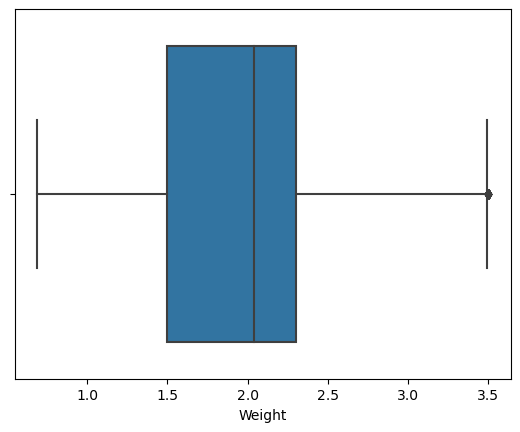

In [57]:
sns.boxplot(x=df['Weight'])
plt.show()

#### We will handle Encoding catgeorical columns using ColumnTransformer

#### Select x(independent features) and y(dependent feature)

In [59]:
x = df.drop('Price',axis=1)
y = df['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1302, 11)
(1302,)


#### Split the data into train and test

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
print(1302*0.25)

325.5


In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(976, 11)
(326, 11)
(976,)
(326,)


#### Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [107]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

#### Import ML model building libraries

In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [110]:
x_train.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [111]:
# Columns index that needs to undergo OnehOtEncoding - [0,1,6,9,10]

#### 1) LinearRegression

In [114]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 13779.804657521538
MSE 441055854.35526544
RMSE 21001.329823496068
R2 Score 0.702906953661964


#### 2) Ridge Regression

In [115]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Ridge(alpha=2.41)

pipe_rid = Pipeline([('step1',step1),('step2',step2)])

pipe_rid.fit(x_train,y_train)

ypred_rid = pipe_rid.predict(x_test)

eval_model(y_test,ypred_rid)

MAE 13539.816447226327
MSE 412006935.2872497
RMSE 20297.953968004993
R2 Score 0.7224741621538668


#### 3) Lasso Regression

In [116]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Lasso(alpha=0.234)

pipe_las = Pipeline([('step1',step1),('step2',step2)])

pipe_las.fit(x_train,y_train)

ypred_las = pipe_las.predict(x_test)

eval_model(y_test,ypred_las)

MAE 13776.624801764425
MSE 440892087.72731245
RMSE 20997.43050297613
R2 Score 0.7030172660541625


#### 4) RandomForest Model

In [117]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=11,random_state=5)

pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

MAE 11710.013859621055
MSE 348209594.2015227
RMSE 18660.374974836992
R2 Score 0.7654477361904976


#### 5) Decision Tree Regressor

In [121]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11,random_state=5)

pipe_dt = Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

MAE 12132.196322590713
MSE 340945360.1042264
RMSE 18464.70579522529
R2 Score 0.7703408884204643


#### DT is the best performing model based on RMSE

#### Model Saving

In [122]:
import pickle

In [127]:
pickle.dump(pipe_dt,open('dt_model.pkl','wb'))   # Saving the best performing model
pickle.dump(df,open('data.pkl','wb'))              # Saving the dataset

In [124]:
print(df['HDD'].unique())
print(df['SSD'].unique())
print(df['Ram'].unique())

[   0  500 1000 2000   32  128]
[ 128    0  256  512   32   64 1000 1024   16  768  180  240    8]
[ 8 16  4  2 12  6 32 24 64]


In [126]:
df['Ips'].value_counts()

0    938
1    364
Name: Ips, dtype: int64